## Observations and Insights 

In [1]:
# %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
data_working = combined_data.copy()

In [4]:
# Checking the number of mice.
mice_count = len(data_working["Mouse ID"].unique())
mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data_working[data_working[["Mouse ID", "Timepoint"]].duplicated()]

duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
data_working[data_working["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_working =data_working[data_working["Mouse ID"] != "g989"]

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(data_working["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

micemean = data_working.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
micemedian = data_working.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
micevar = data_working.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
micestd = data_working.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
micesem =data_working.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


mice_sumstats = {
    "Mean Tumor Volume" : micemean,
    "Median Tumor Volume": micemedian,
    "Variance Tumor Volume": micevar,
    "Standard Deviation Tumor Volume" : micestd,
    "SEM Tumor Volume" : micesem
}

micesummary1_df = pd.DataFrame(mice_sumstats)
micesummary1_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
mice_summary2=data_working.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

mice_summary2_df = pd.DataFrame(mice_summary2)
mice_summary2_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
mousecount = data_working["Drug Regimen"].value_counts()

<AxesSubplot:>

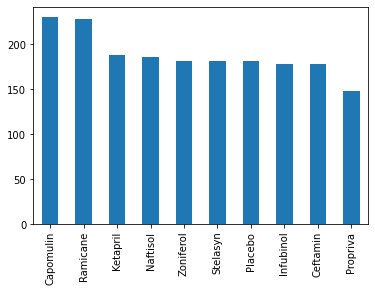

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mousecount.plot(kind="bar")

In [14]:
mousecount

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

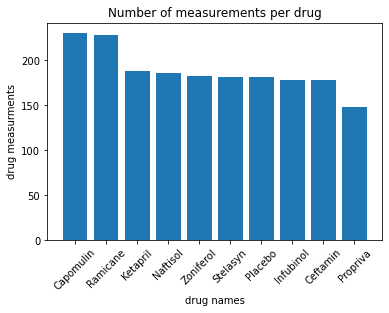

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(mousecount.index, mousecount.values)
plt.title("Number of measurements per drug")
plt.xlabel("drug names")
plt.xticks(rotation=45)
plt.ylabel("drug measurments")

plt.show()

In [16]:
mice_sex = data_working["Sex"].value_counts()
mice_sex

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

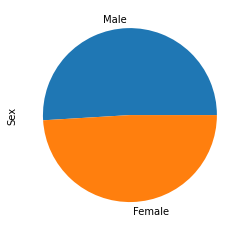

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex.plot(kind='pie')

([<matplotlib.patches.Wedge at 0x7fa1eb1f9790>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

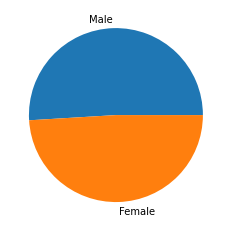

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_sex.index
sizes = mice_sex.values

plt.pie(sizes, labels= labels)

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
greatestmouse = data_working.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatestmouse_m = pd.merge(greatestmouse, data_working, how = "left", on = ["Mouse ID", "Timepoint"])

greatestmouse_m

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumvol = []


for i in drugs:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    mouseCapo = greatestmouse_m[greatestmouse_m["Drug Regimen"]== i]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mouse = mouseCapo["Tumor Volume (mm3)"]
    tumvol.append(mouse)
    # add subset 
    quartiles = mouse.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {i} is: {lowerq}")
    
    print(f"The upper quartile of {i} is: {upperq}")
    
    print(f"The interquartile range of {i} is: {iqr}")
    
    print(f"The the median of {i} is: {quartiles[0.5]} ")
        # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)    
    
    outlierlower = mouseCapo[mouseCapo["Tumor Volume (mm3)"] < lower_bound]
    outlierupper = mouseCapo[mouseCapo["Tumor Volume (mm3)"] > upper_bound]

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 


In [21]:
tumvol

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

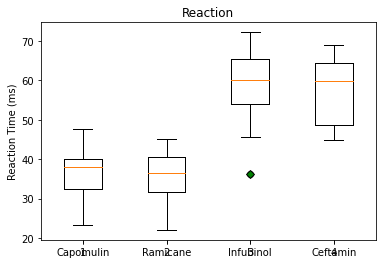

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumvol2 = tumvol[0]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(tumvol, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(tumvol, flierprops= green_diamond)
plt.show()

## Line and Scatter Plots

In [23]:
mouse_vol_time = data_working.loc[data_working["Mouse ID"]== "s185" , :]
mouse_vol_time


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


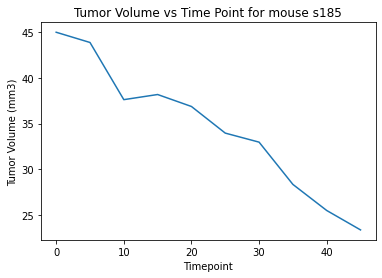

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = mouse_vol_time["Timepoint"]
y_axis = mouse_vol_time["Tumor Volume (mm3)"]

plt.title("Tumor Volume vs Time Point for mouse s185")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [25]:
mouse_drugC = data_working.loc[data_working["Drug Regimen"]== "Capomulin" , :]
mouse_drugC

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [26]:
mouse_mean = mouse_drugC.groupby(["Mouse ID"]).mean()
mouse_mean

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


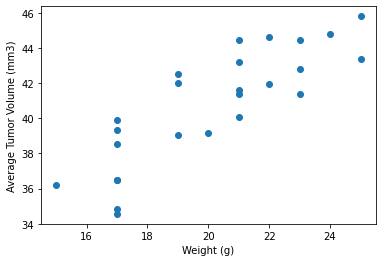

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(mouse_mean["Weight (g)"], mouse_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig("scatterplot")
plt.show()

## Correlation and Regression

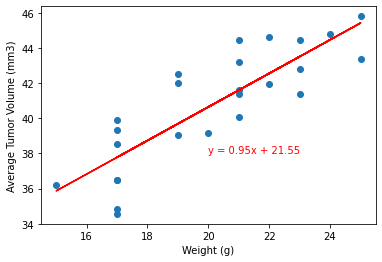

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouseweightC_x = mouse_mean.iloc[:,1]
mousetumorC_y =mouse_mean.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseweightC_x, mousetumorC_y)
regress_values = mouseweightC_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouseweightC_x, mousetumorC_y)
plt.plot(mouseweightC_x,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=10,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()